In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind # for t-test
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
# load data from Google Drive (must be public)
# note: after last slash, replace with "/export/fromat=xlsx"
excel = pd.ExcelFile('https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/fromat=xlsx')

# concatenate all sheets and add a column with the sheet names
df = pd.concat([excel.parse(sheet_name).assign(sheet_name=sheet_name) for sheet_name in excel.sheet_names])
df.reset_index(inplace=True)

In [ ]:
df

,index,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name
0,0,0,194.033698,Private room,False,True,2,False,1,0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,1,1,344.245776,Private room,False,True,4,False,0,0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,2,2,264.101422,Private room,False,True,2,False,0,1,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,3,3,433.529398,Private room,False,True,4,False,0,1,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,4,4,485.552926,Private room,False,True,2,True,0,0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,1794,715.938574,Entire home/apt,False,False,6,False,0,1,...,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna_weekends
51703,1795,1795,304.793960,Entire home/apt,False,False,2,False,0,0,...,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna_weekends
51704,1796,1796,637.168969,Entire home/apt,False,False,2,False,0,0,...,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna_weekends
51705,1797,1797,301.054157,Private room,False,True,2,False,0,0,...,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna_weekends


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       51707 non-null  int64  
 1   Unnamed: 0                  51707 non-null  int64  
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  int64  
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  int64  
 11  guest_satisfaction_overall  51707 non-null  int64  
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

In [ ]:
df["sheet_name2"] = df["sheet_name"].str.split("_")
df["city"]= df["sheet_name2"].str[0]
df["weekday/weekend"]= df["sheet_name2"].str[1]

In [ ]:
df["city"].unique()

array(['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'], dtype=object)

In [ ]:
city_country = {
    "city": ['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'],
    "country": ["netherlands","greece","germany","spain","hungary","portugal","england",
                "france","italy","austria"]
}
city_country_df = pd.DataFrame(city_country)
df2 = df.merge(city_country_df, on="city")

In [ ]:
df2.rename(columns={"realSum": "Price"}, inplace=True)


In [ ]:
df2

,index,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,sheet_name2,city,weekday/weekend,country
0,0,0,194.033698,Private room,False,True,2,False,1,0,...,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,"[amsterdam, weekdays]",amsterdam,weekdays,netherlands
1,1,1,344.245776,Private room,False,True,4,False,0,0,...,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,"[amsterdam, weekdays]",amsterdam,weekdays,netherlands
2,2,2,264.101422,Private room,False,True,2,False,0,1,...,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,"[amsterdam, weekdays]",amsterdam,weekdays,netherlands
3,3,3,433.529398,Private room,False,True,4,False,0,1,...,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,"[amsterdam, weekdays]",amsterdam,weekdays,netherlands
4,4,4,485.552926,Private room,False,True,2,True,0,0,...,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,"[amsterdam, weekdays]",amsterdam,weekdays,netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,1794,715.938574,Entire home/apt,False,False,6,False,0,1,...,15.712158,438.756874,10.604584,16.37940,48.21136,vienna_weekends,"[vienna, weekends]",vienna,weekends,austria
51703,1795,1795,304.793960,Entire home/apt,False,False,2,False,0,0,...,14.678608,342.182813,8.270427,16.38070,48.20296,vienna_weekends,"[vienna, weekends]",vienna,weekends,austria
51704,1796,1796,637.168969,Entire home/apt,False,False,2,False,0,0,...,12.107921,282.296424,6.822996,16.38568,48.20460,vienna_weekends,"[vienna, weekends]",vienna,weekends,austria
51705,1797,1797,301.054157,Private room,False,True,2,False,0,0,...,7.822803,158.563398,3.832416,16.34100,48.19200,vienna_weekends,"[vienna, weekends]",vienna,weekends,austria


In [ ]:
df2.drop(columns=["index","sheet_name","sheet_name2"], inplace=True)

In [ ]:
nlist_by_hosts = []

for index, row in df2.iterrows():
  if row["multi"] == 0 and row ["biz"] == 0:
    nlist_by_hosts.append("1")
   # df['nlist']= 1
  elif row["multi"] == 1 and row["biz"] == 0:
      nlist_by_hosts.append("2-4")
  elif row["multi"] == 0 and row["biz"] ==1:
      nlist_by_hosts.append("more than 4")
  else:
      nlist_by_hosts.append("undefined")

In [ ]:
df2["nlist_by_hosts"] = nlist_by_hosts

In [ ]:
df2

,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday/weekend,country,nlist_by_hosts
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,netherlands,2-4
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,netherlands,1
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,netherlands,more than 4
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,netherlands,more than 4
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,netherlands,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends,austria,more than 4
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends,austria,1
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,...,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends,austria,1
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,...,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends,austria,1


In [ ]:
for index, row in df2.iterrows():
  if row["room_shared"] ==1:
    df2["shared/private"] = "shared"
  elif row["room_private"] ==1:
    df2["shared/private"] = "private"
  else:
    df2["shared/private"] = "other"

Data Analysis

In [ ]:
df = df2

In [ ]:
print(df.head())
print(df.tail())
print(df.sample(n=7))

   Unnamed: 0       Price     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0                2              False      1    0                  10  ...   
1                4              False      0    0                   8  ...   
2                2              False      0    1                   9  ...   
3                4              False      0    1                   9  ...   
4                2               True      0    0                  10  ...   

   attr_index_norm  rest_index  rest_index_norm      lng       lat       city  \
0         4.166708   98.25389

In [ ]:
print(df.dtypes)

Unnamed: 0                      int64
Price                         float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
weekday/weekend                object
country                        object
nlist_by_hosts                 object
shared/private                 object
dtype: object


In [ ]:
print(df.describe())  # descriptive stat for numeric values

         Unnamed: 0         Price  person_capacity         multi  \
count  51707.000000  51707.000000     51707.000000  51707.000000   
mean    1620.502388    279.879591         3.161661      0.291353   
std     1217.380366    327.948386         1.298545      0.454390   
min        0.000000     34.779339         2.000000      0.000000   
25%      646.000000    148.752174         2.000000      0.000000   
50%     1334.000000    211.343089         3.000000      0.000000   
75%     2382.000000    319.694287         4.000000      1.000000   
max     5378.000000  18545.450285         6.000000      1.000000   

                biz  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean       0.350204            9.390624                   92.628232   
std        0.477038            0.954868                    8.945531   
min        0.000000            2.000000                   20.000000   
25%        0.000000            9

In [ ]:
print(df.describe(include=["object","bool"])) # for objects and booleans

              room_type room_shared room_private host_is_superhost    city  \
count             51707       51707        51707             51707   51707   
unique                3           2            2                 2      10   
top     Entire home/apt       False        False             False  london   
freq              32648       51341        33014             38475    9993   

       weekday/weekend  country nlist_by_hosts shared/private  
count            51707    51707          51707          51707  
unique               2       10              3              1  
top           weekends  england              1        private  
freq             26207     9993          18534          51707  


In [ ]:
# How many listings are in each city in total and also per type of day?
print(df.groupby("city").size())

print(df.groupby(["city",  "weekday/weekend"]).size())


city
amsterdam    2080
athens       5280
barcelona    2833
berlin       2484
budapest     4022
lisbon       5763
london       9993
paris        6688
rome         9027
vienna       3537
dtype: int64
city       weekday/weekend
amsterdam  weekdays           1103
           weekends            977
athens     weekdays           2653
           weekends           2627
barcelona  weekdays           1555
           weekends           1278
berlin     weekdays           1284
           weekends           1200
budapest   weekdays           2074
           weekends           1948
lisbon     weekdays           2857
           weekends           2906
london     weekdays           4614
           weekends           5379
paris      weekdays           3130
           weekends           3558
rome       weekdays           4492
           weekends           4535
vienna     weekdays           1738
           weekends           1799
dtype: int64


In [ ]:
# Which city has the biggest proportion of superhosts?
total = df.groupby("city").size()
superhost= df[df["host_is_superhost"]==1].groupby("city").size()
proportion = round(superhost/total,2)
print(proportion.sort_values(ascending=False))

city
athens       0.43
budapest     0.38
rome         0.33
amsterdam    0.28
vienna       0.28
berlin       0.26
lisbon       0.21
barcelona    0.18
london       0.16
paris        0.14
dtype: float64


In [ ]:
# Which cities have listings with more than four rooms?

print(df[df["bedrooms"] > 4 ]["city"].unique())

['amsterdam' 'berlin' 'barcelona' 'lisbon' 'london' 'paris' 'rome']


In [ ]:
# Which city has the most entire home/apt type listings?

print(df[df["room_type"]== 'Entire home/apt'].groupby("city").size().sort_values(ascending=False))

city
rome         5561
paris        5067
athens       4872
london       4384
lisbon       3878
budapest     3589
vienna       2747
amsterdam    1126
berlin        882
barcelona     542
dtype: int64


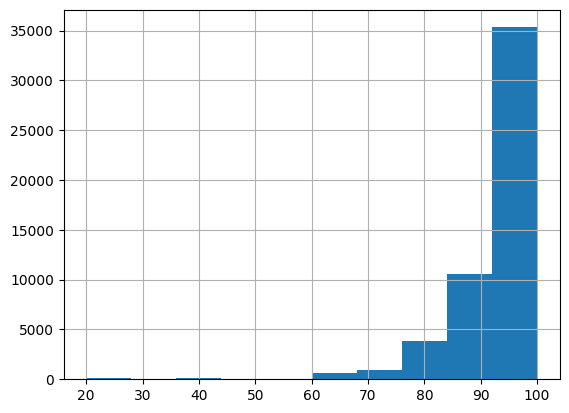

In [ ]:
# Are ratings typically high across listings, or is there a wide variation?
# Plot the distribution of guest_satisfaction_overall ratings.
# Examine the distribution of cleanliness_rating.
import matplotlib.pyplot as plt

df["guest_satisfaction_overall"].hist()
plt.show()

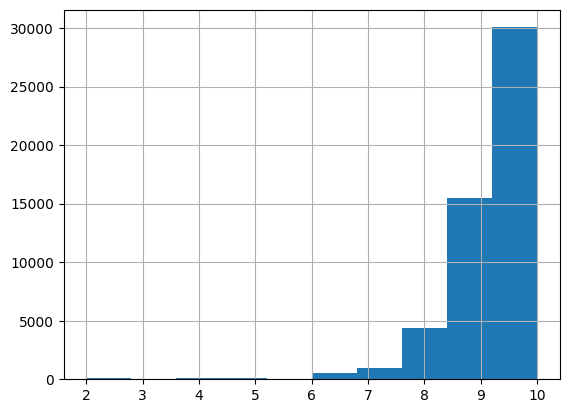

In [ ]:
df["cleanliness_rating"].hist()
plt.show()

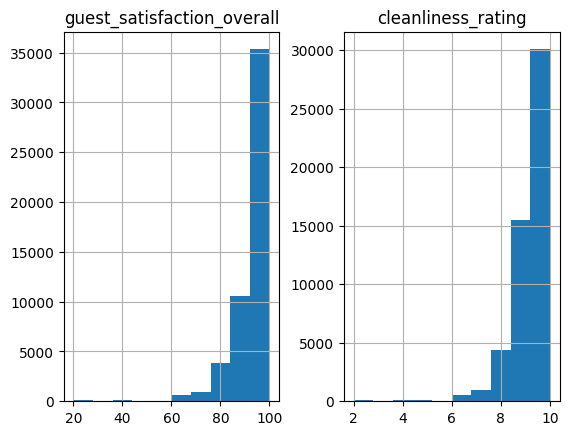

In [ ]:
df[["guest_satisfaction_overall", "cleanliness_rating"]].hist()
plt.show()


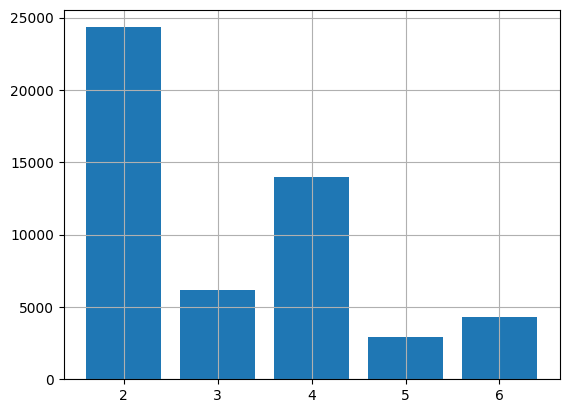

In [ ]:
# How does person_capacity vary across listings? What is the most common capacity of listings?

df["person_capacity"].hist(bins=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5], rwidth=0.8)

plt.show()

# most common category is 2

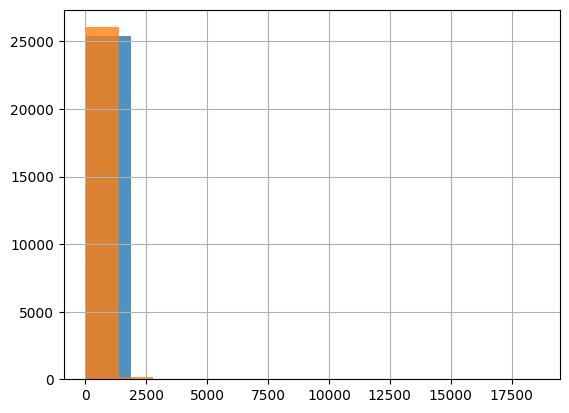

In [ ]:
# Plot the distribution of price (former realSum) for both weekday and weekend offers
# check normality, skewness, modality
# If skewed, consider using transformations (e.g. log); can you normalize it?

df.groupby("weekday/weekend")["Price"].hist(alpha=0.8)
plt.show() # it's right-skewed


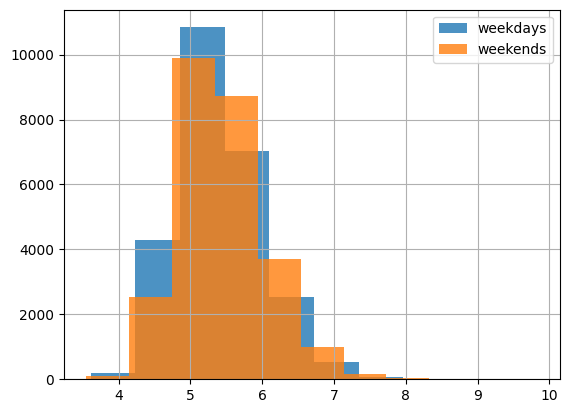

In [ ]:
df["price_log"] = np.log(df["Price"]) # natural log(ln)
df.groupby("weekday/weekend")["price_log"].hist(alpha=0.8, legend=True)
plt.show()


In [ ]:
weekdays_price = df[df["weekday/weekend"]=="weekdays"]["price_log"]
weekends_price = df[df["weekday/weekend"]=="weekends"]["price_log"]

t_stat, p_value = ttest_ind(weekdays_price, weekends_price, equal_var=False)
print(f" t_stat is negative: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that weekday prices are significantly lower than weekend prices, with a highly significant difference (p ≈ 4.24e-13).")


 t_stat is negative: -7.25
 p_value is almost 0: 4.243462661046137e-13
The t-test shows that weekday prices are significantly lower than weekend prices, with a highly significant difference (p ≈ 4.24e-13).


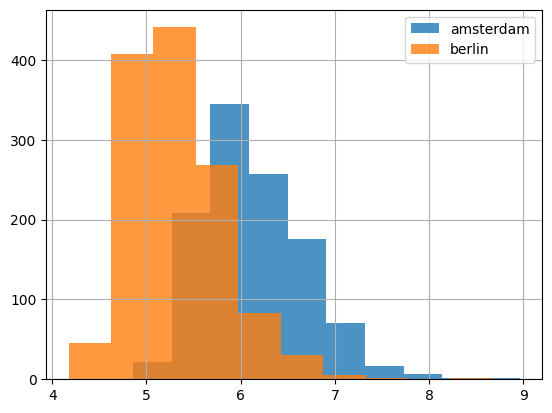

In [ ]:
# Is there a difference in price per night between two cities? Choose at least three pairs of cities during weekdays

df[(df["weekday/weekend"]=="weekdays") &
   (df["city"].isin(["amsterdam","berlin"])) ].groupby("city")["price_log"].hist(alpha = 0.8, legend=True)
#title
#legend
plt.show()

In [ ]:
amsterdam_weekdays_price = df[(df["weekday/weekend"]=="weekdays") & (df["city"]== "amsterdam")]["price_log"]
berlin_weekdays_price = df[(df["weekday/weekend"]=="weekdays") & (df["city"]== "berlin")]["price_log"]

t_stat, p_value = ttest_ind(amsterdam_weekdays_price, berlin_weekdays_price, equal_var=False)
print(f" t_stat is positive: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that Amsterdam weekday prices are significantly higher than Berlin Weekdays prices, with a highly significant difference (p ≈ 8.11e-245).")


 t_stat is positive: 37.98
 p_value is almost 0: 8.115475411630956e-245
The t-test shows that Amsterdam weekday prices are significantly higher than Berlin Weekdays prices, with a highly significant difference (p ≈ 8.11e-245).


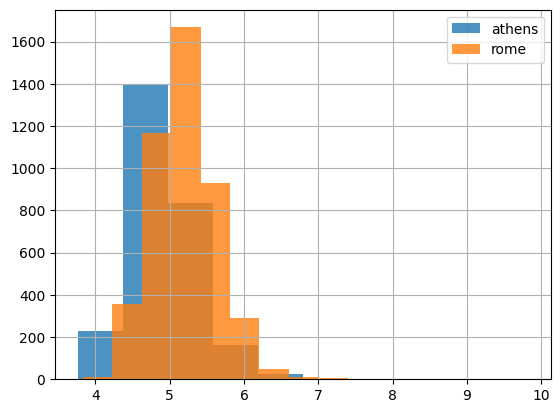

In [ ]:
df[(df["weekday/weekend"]=="weekdays") &
   (df["city"].isin(["rome","athens"])) ].groupby("city")["price_log"].hist(alpha = 0.8, legend=True)
#title
plt.show()

In [ ]:
athens_weekdays_price = df[(df["weekday/weekend"]=="weekdays") & (df["city"]== "athens")]["price_log"]
rome_weekdays_price = df[(df["weekday/weekend"]=="weekdays") & (df["city"]== "rome")]["price_log"]

t_stat, p_value = ttest_ind(athens_weekdays_price, rome_weekdays_price, equal_var=False)
print(f" t_stat is negative: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that Athens weekday prices are significantly lower than Rome Weekdays prices, with a highly significant difference (p ≈ 1.84e-161).")

 t_stat is positive: -28.03
 p_value is almost 0: 1.8400870595038976e-161
The t-test shows that Athens weekday prices are significantly lower than Rome Weekdays prices, with a highly significant difference (p ≈ 1.84e-161).


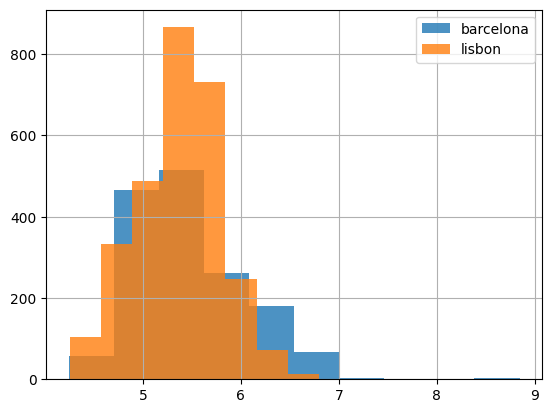

In [ ]:
df[(df["weekday/weekend"]=="weekdays") &
   (df["city"].isin(["barcelona","lisbon"])) ].groupby("city")["price_log"].hist(alpha = 0.8, legend=True)
#title
plt.show()

In [ ]:
barcelona_weekdays_price = df[(df["weekday/weekend"]=="weekdays") & (df["city"]== "barcelona")]["price_log"]
lisbon_weekdays_price = df[(df["weekday/weekend"]=="weekdays") & (df["city"]== "lisbon")]["price_log"]

t_stat, p_value = ttest_ind(barcelona_weekdays_price, lisbon_weekdays_price, equal_var=False)
print(f" t_stat is positive: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that Barcelona weekday prices are significantly higher than Lisbon Weekdays prices, with a highly significant difference (p ≈ 6.80e-09).")

 t_stat is positive: 5.82
 p_value is almost 0: 6.805346666514461e-09
The t-test shows that Barcelona weekday prices are significantly higher than Lisbon Weekdays prices, with a highly significant difference (p ≈ 6.80e-09).


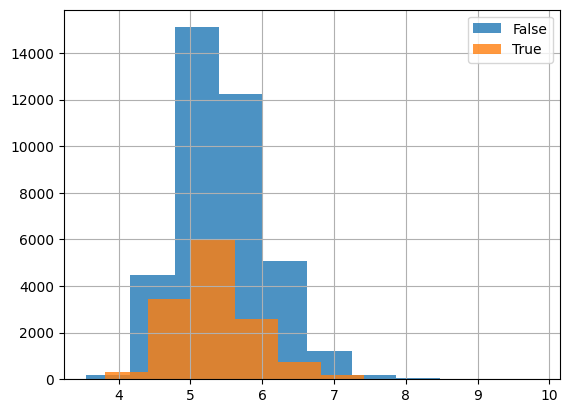

In [ ]:
# Are listings of superhosts more expensive than those of normal hosts?
df.groupby("host_is_superhost")["price_log"].hist(alpha = 0.8, legend=True)
#title
plt.show()


In [ ]:
superhost_price = df[df["host_is_superhost"]==1]["price_log"]
normalhost_price = df[df["host_is_superhost"]==0]["price_log"]

t_stat, p_value = ttest_ind(superhost_price, normalhost_price, equal_var=False)
print(f" t_stat is negative: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that listings of superhost prices are significantly lower than those of normal hosts, with a highly significant difference (p ≈ 3.98e-63).")

 t_stat is positive: -16.82
 p_value is almost 0: 3.982674890599372e-63
The t-test shows that listings of superhost prices are significantly lower than those of normal hosts, with a highly significant difference (p ≈ 3.98e-63).


In [ ]:
# Are superhosts closer to the city center and metro station than normal hosts?

# dist, metro_dist

np.float64(5.347796295928411)

,dist
host_is_superhost,
False,"Axes(0.125,0.11;0.775x0.77)"
True,"Axes(0.125,0.11;0.775x0.77)"


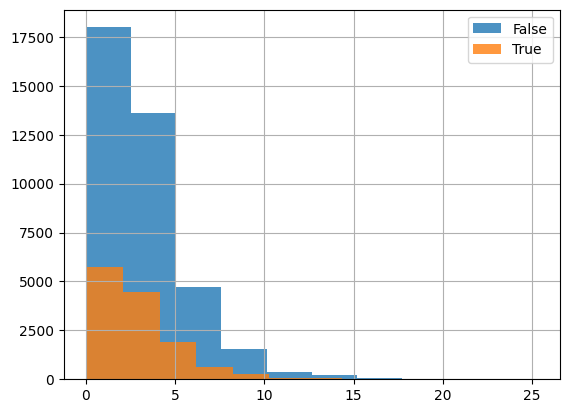

In [ ]:
df.groupby("host_is_superhost")["dist"].hist(alpha = 0.8, legend=True) # right-skewed

,metro_dist
host_is_superhost,
False,"Axes(0.125,0.11;0.775x0.77)"
True,"Axes(0.125,0.11;0.775x0.77)"


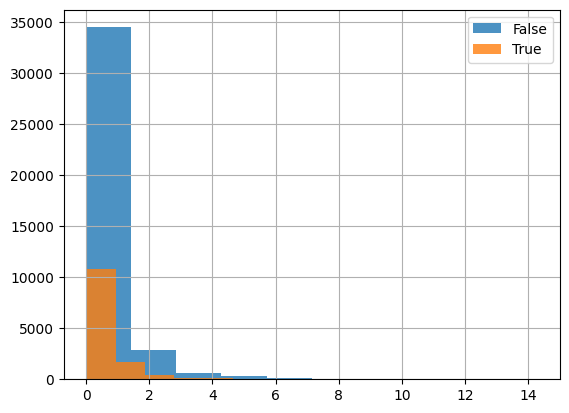

In [ ]:
df.groupby("host_is_superhost")["metro_dist"].hist(alpha = 0.8, legend=True) # right-skewed

In [ ]:
df["dist_log"] = np.log(df["dist"])
df["metro_dist_log"] = np.log(df["metro_dist"])

In [ ]:
# Distance to the city center

superhost_dist = df[df["host_is_superhost"]==1]["dist_log"]
normalhost_dist = df[df["host_is_superhost"]==0]["dist_log"]

t_stat, p_value = ttest_ind(superhost_dist, normalhost_dist, equal_var=False)
print(f" t_stat is negative: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that distance from the city center is significantly lower for superhosts than those of normal hosts, with a highly significant difference (p ≈ 1.29e-41).")

 t_stat is negative: -13.54
 p_value is almost 0: 1.2911657222231667e-41
The t-test shows that distance from the city center is significantly lower for superhosts than those of normal hosts, with a highly significant difference (p ≈ 1.29e-41).


In [ ]:
# Distance to the city center

superhost_metro_dist = df[df["host_is_superhost"]==1]["metro_dist_log"]
normalhost_metro_dist = df[df["host_is_superhost"]==0]["metro_dist_log"]

t_stat, p_value = ttest_ind(superhost_metro_dist, normalhost_metro_dist, equal_var=False)
print(f" t_stat is positive: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that distance from the city center is significantly higher for superhosts than those of normal hosts, with a highly significant difference (p ≈ 2.41e-07).")

 t_stat is negative: 5.17
 p_value is almost 0: 2.415827978077358e-07
The t-test shows that distance from the city center is significantly lower for superhosts than those of normal hosts, with a highly significant difference (p ≈ 1.29e-41).


,cleanliness_rating
host_is_superhost,
False,"Axes(0.125,0.11;0.775x0.77)"
True,"Axes(0.125,0.11;0.775x0.77)"


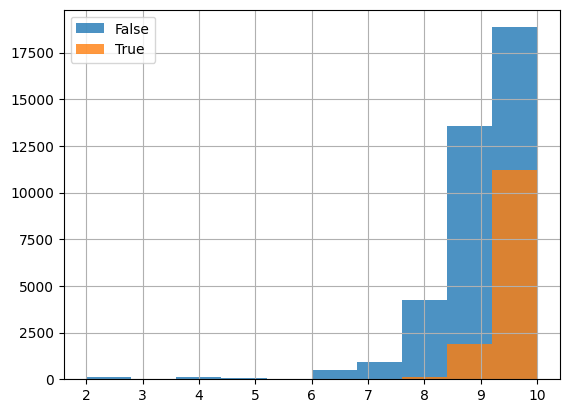

In [ ]:
# Are superhosts cleaner than normal hosts?

# cleanliness_rating

df.groupby("host_is_superhost")["cleanliness_rating"].hist(alpha = 0.8, legend=True) # left-skewed

df["cleanliness_rating"].plot(kind="box")
df["cleanliness_rating"].value_counts()


<Axes: >

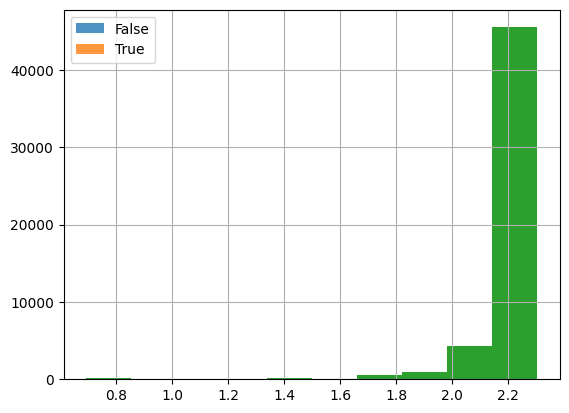

In [ ]:
df["cleanliness_rating_log"] = np.log(df["cleanliness_rating"])

df["cleanliness_rating_log"].hist() # still left-skewed. t-test results cannot be trusted.

In [ ]:
# Mann-Whitney U Test

# I use ai for this test and commentary.

superhost_cleanliness_rating = df[df["host_is_superhost"]==1]["cleanliness_rating"]
normalhost_cleanliness_rating = df[df["host_is_superhost"]==0]["cleanliness_rating"]

print(f"Superhost median: {superhost_cleanliness_rating.median()}")
print(f"Normalhost median: {normalhost_cleanliness_rating.median()}")

statistic, p_value = mannwhitneyu(superhost_cleanliness_rating, normalhost_cleanliness_rating, alternative='two-sided')

print(f"U statistic: {statistic} (This large value indicates a significant separation between the ranked scores of the two groups. )")
print(f"p-value: {p_value} (Statistically significant at alpha = 5 % )")

Superhost median: 10.0
Normalhost median: 9.0
U statistic: 350501184.5 (This large value indicates a significant separation between the ranked scores of the two groups. )
p-value: 0.0 (Statistically significant at alpha = 5 % )


Due to the extreme left-skewness and ceiling effect observed in the cleanliness ratings (with one group's median being 10), the difference between the two independent groups was analyzed using the non-parametric Mann-Whitney U Test. his statistical separation, strongly demonstrated by the Superhost group's median rating of 10, validates that superior and consistent cleanliness is a definitive and measurable differentiator for their status.

In [ ]:
# Is there a pattern between room types and superhost status?

# categorical values so use chi-square. I will use ai to do this.

# The first step is to create a Contingency Table:

In [ ]:
contingency_table = pd.crosstab(
    df['room_type'],    # This will be the rows
    df['host_is_superhost'] # This will be the columns
)
print(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n--- Chi-Square Test Results ---")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H₀. There IS a statistically significant association between Room Type and Superhost Status at alpha = 5%.")
else:
    print("Conclusion: Fail to Reject H₀. There is NO statistically significant association between Room Type and Superhost Status at alpha = 5%.")

host_is_superhost  False  True 
room_type                      
Entire home/apt    23704   8944
Private room       14446   4247
Shared room          325     41

--- Chi-Square Test Results ---
Chi-Square Statistic: 176.54
P-Value: 0.0000
Conclusion: Reject H₀. There IS a statistically significant association between Room Type and Superhost Status at alpha = 5%.


In [ ]:
# Direction of the relationship

percentages = pd.crosstab(
    df['room_type'],
    df['host_is_superhost'],
    normalize='index'
) * 100

print(round(percentages,2))

host_is_superhost  False  True 
room_type                      
Entire home/apt    72.60  27.40
Private room       77.28  22.72
Shared room        88.80  11.20


The relationship follows a strong, declining sequence:$$\text{Entire Home/apt} (27.40\%) > \text{Private Room} (22.72\%) > \text{Shared Room} (11.20\%)$$General Conclusion: The likelihood of achieving Superhost status is directly proportional to the level of privacy and independence of the rented space.

In [ ]:
# Is renting an entire home/apt more expensive than a private room? Does that depend on the city?

entire_home_price = df[df["room_type"]== "Entire home/apt"]["price_log"]
private_room_price = df[df["room_type"]== "Private room"]["price_log"]


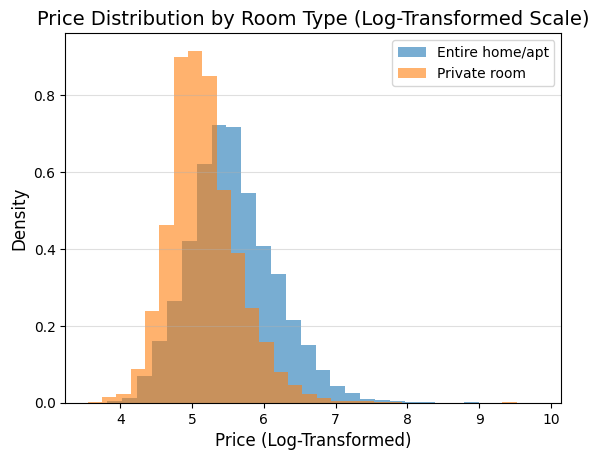

In [ ]:
plt.hist(
    entire_home_price,
    bins=30,  # A sufficient number of bins for detailed distribution
    alpha=0.6, # Critical for seeing overlapping areas
    label='Entire home/apt',
    density=True # Use density=True to compare shapes regardless of sample size
)

# Plot the second histogram (Private Room)
plt.hist(
    private_room_price,
    bins=30,
    alpha=0.6,
    label='Private room',
    density=True
)

# Add title and axis labels
plt.title('Price Distribution by Room Type (Log-Transformed Scale)', fontsize=14)
plt.xlabel('Price (Log-Transformed)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.4)

plt.show()

In [ ]:
t_stat, p_value = ttest_ind(entire_home_price, private_room_price, equal_var=False)
print(f" t_stat is positive: {round(t_stat,2)}")
print(f" p_value is almost 0: {p_value}")
print("The t-test shows that the entire home prices are significantly higher than the private room prices, with a highly significant difference (p ≈ 0")

 t_stat is positive: 82.0
 p_value is almost 0: 0.0
The t-test shows that the entire home prices are significantly higher than the private room prices, with a highly significant difference (p ≈ 0


In [ ]:
price_by_city_room = df[df['room_type'].isin(['Entire home/apt', 'Private room'])].groupby(['city', 'room_type'])['price_log'].median().round(2)
price_comparison_table = price_by_city_room.unstack(level='room_type')

In [ ]:
print(price_comparison_table)

room_type,Entire home/apt,Private room
city,,
amsterdam,6.42,5.81
athens,4.89,4.38
barcelona,6.21,5.23
berlin,5.69,5.08
budapest,5.07,4.51
lisbon,5.56,4.91
london,6.11,5.20
paris,5.83,5.54
rome,5.36,4.89


Based on the median log-transformed prices, the analysis clearly shows that renting an Entire home/apt is consistently more expensive than renting a Private room across all ten cities analyzed. In every city, the median log-price for Entire home/apt is higher than that for Private rooms.

Furthermore, the magnitude of this price premium varies significantly by city: the log-price difference is highest in Barcelona (+0.98) and London (+0.91), while the difference is lowest and least pronounced in Paris (+0.29).

In [ ]:
from google.colab import files
df.to_excel('04_homework_group4_data.xlsx', index=False)
files.download("04_homework_group4_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>